PLIKE
=====

PLIKE is an optional tool within the pyZDCF module in pyPetal. PLIKE is a Python implementation of the PLIKE Fortran code <cite data-cite="alexander_improved_2013">(Alexander 2013)</cite>, which calculates the peak of the ZDCF and its uncertainty through maximum likelihood methods.

More specifically, PLIKE will calculate the likelihood of the peak of the ZDCF being at a given time lag $\tau$. The peak of this likelihood is then used to estimate the peak of the ZDCF, and the likelihood distribution is used to calculate its uncertainty.

Installation
------------

PLIKE will not automatically be installed with the rest of pyPetal. However, there is a script in the main pyPetal directory (``build_plike.sh``), which can install PLIKE in the pyPetal directory. However, this script assumes that the user has ``gfortran`` installed as a Fortran compiler. 

If installing with ``build_plike.sh``, a directory called ``plike_v4`` will be created in the pyPetal directory, with the PLIKE executable.

If not installing with ``build_plike.sh``, the code can be downloaded from https://www.weizmann.ac.il/particle/tal/research-activities/software, and compiled afterwards.

Regardless, the directory containing the PLIKE executable will need to be specified when running the pyZDCF module in pyPetal.

PLIKE Arguments
---------------

* ``run_plike``: If ``True``, PLIKE will be run after pyZDCF. Default is ``False``.

* ``plike_dir``: The directory containing the PLIKE executable. Must be specified if ``run_plike=True``. Default is ``None``.

PLIKE will also use ``lag_bounds`` in the general arguments to determine which lag range to search.

Using PLIKE
-----------

In this example, we'll assume that ``build_plike.sh`` was used, and that the PLIKE executable is in the ``plike_v4`` directory:

In [1]:
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/pyzdcf_'
filenames = [main_dir + 'lc1.dat', main_dir + 'lc2.dat']

line_names = ['Continuum', 'H-alpha']
output_dir = 'plike_output/'


Running pyZDCF
----------------------
nsim: 850
minpts: 0
uniform_sampling: False
omit_zero_lags: True
sparse: auto
prefix: pyzdcf
run_plike: True
plike_dir: pypetal/plike_v4/
----------------------
        
Executing PLIKE


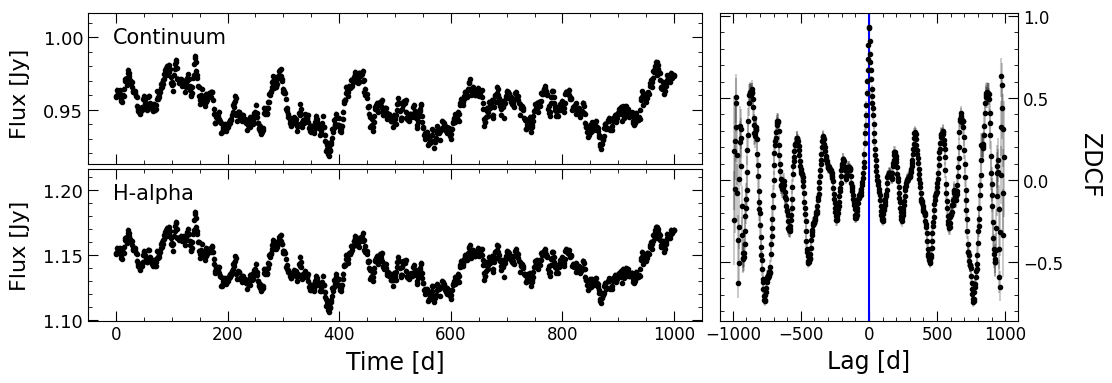

In [2]:
params = {
    'nsim': 850,
    'prefix': 'pyzdcf',
    'run_plike': True,
    'plike_dir': 'pypetal/plike_v4/'
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                      run_pyzdcf=True,
                      pyzdcf_params=params,
                      verbose=True,
                      plot=True,
                      time_unit='d',
                      lc_unit='Jy',
                      file_fmt='csv',
                      lag_bounds=[-500,500])

PLIKE Output Files
------------------

PLIKE will output a table with its results, being the likellihood of the peak of the ZDCF being at a given lag $\tau$. The table will be saved in the ``pyzdcf`` directory for a given line, and be named ``(name)_plike.out``, where ``(name)`` is the name of the line.

The output table has the following columns:

* ``lag``: The time lags for the ZDCF.
* ``r``: The ZDCF values.
* ``-dr``: The lower uncertainty on the ZDCF values.
* ``+dr``: The upper uncertainty on the ZDCF values.
* ``likelihood``: The likelihood that a given lag $\tau$ is the peak of the ZDCF.

The file will also contain the maximum likelihood (ML) lag and its uncertainties.

In addition, the pyZDCF figure described previously will contain an indicator where the ML lag is located.

PLIKE Output Dict
-----------------

If PLIKE is run, there will be a separate output in the overall resulting output for pyPetal. The output will be located in the ``plike`` key in the pyPetal output dictionary, with a list of dictionaries for each line. 

Each individual dictionary will have the following keys:

* ``output``: The output table from PLIKE.
* ``ML_lag``: The maximum likelihood lag.
* ``ML_lag_err_lo``: The lower uncertainty on the maximum likelihood lag.
* ``ML_lag_err_hi``: The upper uncertainty on the maximum likelihood lag.

.. bibliography::